<html>
    <h1 style="color:blue;text-align: center;">Feature Engineering</h1>
    <h2 style="color:green;text-align: center;">Encoding Categorical Data | Ordinal Encoding | Label Encoding</h2>
</html>

In [1]:
# 1. Import the requests library
import requests

URL = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv"
# 2. download the data behind the URL
response = requests.get(URL)

# 3. Open the response into a new file called instagram.ico
open("customer.csv", "wb").write(response.content)

1227

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('customer.csv')
df.sample(5)

,age,gender,review,education,purchased
27,69,Female,Poor,PG,No
48,39,Female,Good,UG,Yes
29,83,Female,Average,UG,Yes
40,39,Male,Good,School,No
6,18,Male,Good,School,No


In [7]:
df = df.iloc[:,2:]
df.sample(5)

,review,education,purchased
0,Average,School,No
40,Good,School,No
22,Poor,PG,Yes
6,Good,School,No
18,Good,School,No


<h2 style="color:green;text-align: left;">OrdinalEncoder</h2>

In the above `customer` dataset. There are two ordinal features `review` and `education`. `Review` has 3 different value
`Good`, `Average`, `Poor`. We will mark theme as integer as there priority. `Good : 2`, `Average : 1` and `Poor : 0`. In the same way for `education` - `School : 0`, `UG : 1` and `PG : 2`.


> 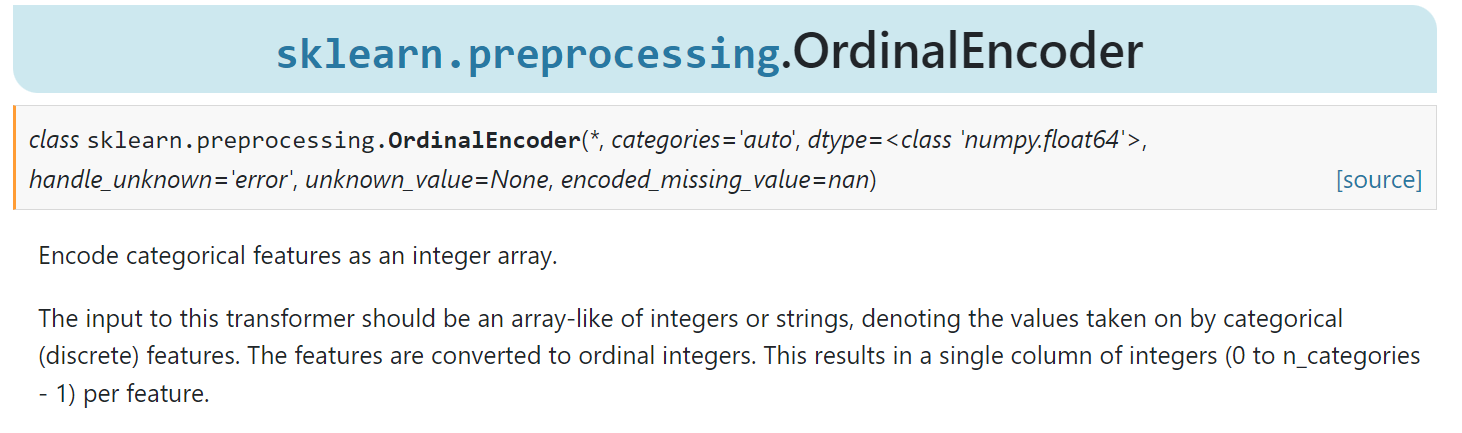

* If categories is `auto` then category will be selected randomly. No preferance will be given.
* Pass category as list of list.

In [8]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2],df.iloc[:,-1:], test_size=0.33)

In [21]:
X_train.shape,X_test.shape

((33, 2), (17, 2))

In [23]:
y_train.shape,y_test.shape

((33, 1), (17, 1))

In [24]:
#passing categories as list of list according there column number one by one
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [25]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [26]:
X_train = oe.transform(X_train)

In [28]:
X_train[:5,:]

array([[2., 0.],
       [1., 1.],
       [1., 2.],
       [2., 2.],
       [2., 1.]])

In [29]:
oe.categories

[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']]

In [30]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

## Let's give some unknown category to DF

In [42]:
df.head(5)

,review,education,purchased
0,Avg,Boys School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [43]:
df.loc[0] = ['Avg','Boys School','No']

In [44]:
df.head()

,review,education,purchased
0,Avg,Boys School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [46]:
#passing categories as list of list according there column number one by one
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']],handle_unknown='use_encoded_value',unknown_value=-1)
oe.fit(df.iloc[:,:2])
X_train = oe.transform(df.iloc[:,:2])

In [48]:
X_train[:5,:]

array([[-1., -1.],
       [ 0.,  1.],
       [ 2.,  2.],
       [ 2.,  2.],
       [ 1.,  1.]])

**Notice :** Unknown values are filled with `-1`

## Passing error to handle_unknown

In [50]:
#passing categories as list of list according there column number one by one
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']],handle_unknown='error')
oe.fit(df.iloc[:,:2])
X_train = oe.transform(df.iloc[:,:2])

ValueError: Found unknown categories ['Avg'] in column 0 during fit

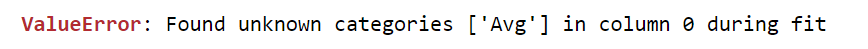

**Note : Default vaule if `error` if we have any unknown category then code will go through error.**
To handel unknown category we have to pass `handle_unknown` as `use_encoded_value` and pass `unoknown_value` as `integer`.

<h2 style="color:green;text-align: left;">LabelEncoder</h2>

>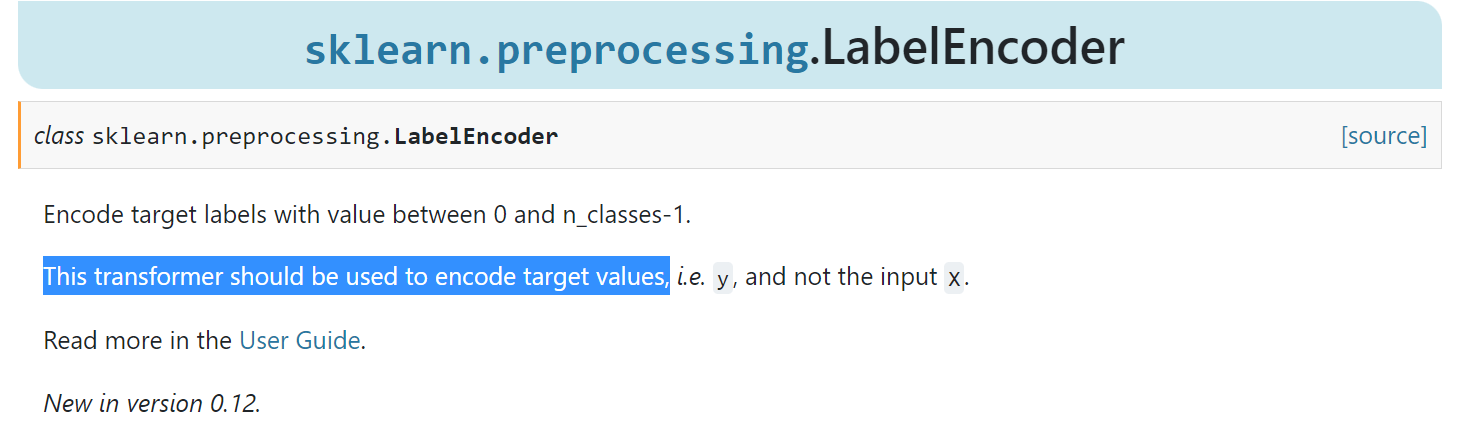

In [51]:
df = pd.read_csv('customer.csv')
df = df.iloc[:,2:]
df.sample(5)

,review,education,purchased
29,Average,UG,Yes
11,Good,UG,Yes
35,Poor,School,Yes
3,Good,PG,No
49,Good,UG,No


In [68]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2],df.iloc[:,-1:], test_size=0.33)

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()
le.fit(y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

**Note :** Above method is wrong way to pass y_train. We have to make `1D aray` from `column vector`.

In [71]:
le = LabelEncoder()
le.fit(y_train.values.ravel())

LabelEncoder()

In [72]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [73]:
y_train

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [74]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])